# Random Forest
Moving to a more sophisticated tree example, using Random Forests for regression.
### Lab prep

In [1]:
import pandas as pd
import pylab
import seaborn as sns
import numpy as np
import datetime
import copy
import shap
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor

In [2]:
import utils
df = utils.get_data()
len(df)

348

In [3]:
X = np.array(df[["month", "temp_2", "temp_1", "average", "week_Fri", "week_Mon", "week_Sat", "week_Sun", "week_Thurs", "week_Tues", "week_Wed", "unix_days"]])
y = np.array(df["actual"])
print(X.shape)
print(y.shape)

(348, 12)
(348,)


### Random Forest
From looking at the average in the dataset, and the performance of decision trees, the baseline was a mean abs error of 5 Farenheit, and a tuned decision tree gave a mean abs error of just below 4 Farenheit. The out-of-the-box params for a Random Forest gives a mean abs error of just below 4 Farenheit.

In [4]:
regr = RandomForestRegressor()
scores = utils.get_cross_val_scores(regr, X, y, 5)
print((scores, np.mean(scores)))

(array([-4.31385714, -3.78171429, -4.18014286, -3.64681159, -3.64449275]), -3.9134037267080743)


Tweaking the default parameters does not seem to dramatically improve results, although parameters can be tweaked to reduce runtime (reducing n_estimators from the default of 100) for faster run times. This would be handy for grid-search parameter tuning.

In [5]:
regr = RandomForestRegressor(
    n_estimators=20,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=15,
    max_features="auto",
    max_leaf_nodes=12,
    ccp_alpha=0.0,
    max_samples=None
)
scores = utils.get_cross_val_scores(regr, X, y, 5)
print((scores, np.mean(scores)))

(array([-3.16570519, -4.29976276, -3.88275042, -3.8244439 , -3.84243308]), -3.8030190670900863)


### SHAP
Use SHAP to help us clean up the feature space

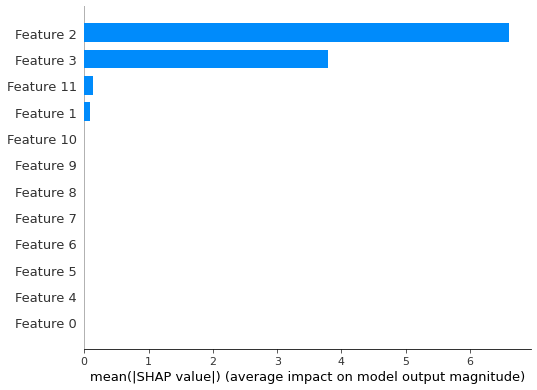

In [6]:
X_train, X_test, y_train, y_test = utils.get_train_test_split(X, y)
regr.fit(X_train, y_train)
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

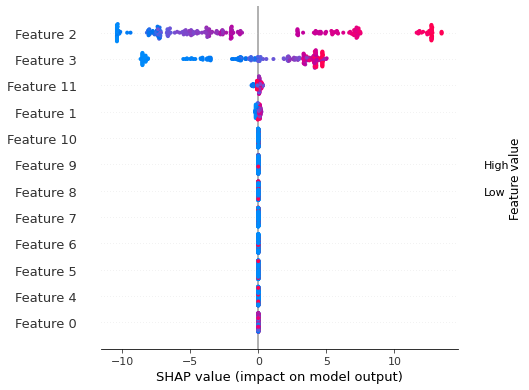

In [7]:
shap.summary_plot(shap_values, X_train)

The SHAP values indicate that the previous day's temperature (temp_1) and the average are the most important features. There are then small corrections coming from the day count, and the temperature 2 days ago.

The other features (which may have had an effect, depending on how the data was captured) seem to have no effect. On these grounds, having model features of the previous two days temperature, and the average temperature, seems justified. The day count will be dropped, since that feels like a feature that might not generalize beyond the dataset (which is only one year; 2016).

### Modified Lap prep and Random Forest

Running through the data above, but now using only 3 features. This yields similar results to before, with a mean abs error around 3.8 Farenheit. Given that the model only has 3 features, it's difficult to see that a more sophisticated model would improve performance.

In [8]:
X = np.array(df[["temp_2", "temp_1", "average"]])
y = np.array(df["actual"])
print(X.shape)
print(y.shape)

(348, 3)
(348,)


In [9]:
regr = RandomForestRegressor()
scores = utils.get_cross_val_scores(regr, X, y, 5)
print((scores, np.mean(scores)))

(array([-3.78085714, -4.05114286, -3.46442857, -3.95289855, -3.91086957]), -3.8320393374741193)


In [10]:
regr = RandomForestRegressor(
    n_estimators=20,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=15,
    max_features="auto",
    max_leaf_nodes=12,
    ccp_alpha=0.0,
    max_samples=None
)
scores = utils.get_cross_val_scores(regr, X, y, 5)
print((scores, np.mean(scores)))

(array([-3.90690348, -3.38473534, -4.3098683 , -3.72985423, -3.62003195]), -3.7902786604874033)


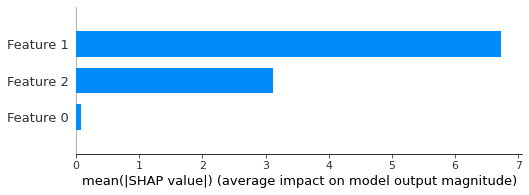

In [13]:
X_train, X_test, y_train, y_test = utils.get_train_test_split(X, y)
regr.fit(X_train, y_train)
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

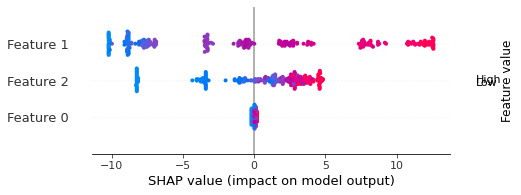

In [14]:
shap.summary_plot(shap_values, X_train)